In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_boston()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

# DATA DESCRIPTION

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# MAKING A DATAFRAME

In [4]:
df = pd.DataFrame(data = data.data , columns = data.feature_names)

# adding target(price) column in df

df["PRICE"] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# VISUALIZING DATA
## HISTOGRAMS,BAR CHARTS,DISTRIBUTION

### HISTOGRAM(PRICE)

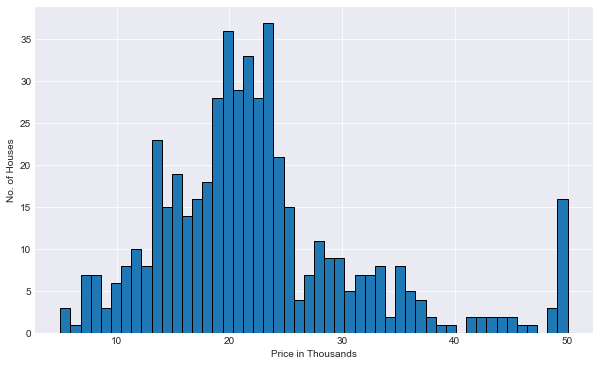

In [5]:
#STYLING
plt.figure(figsize  = (10,6))

plt.style.use('seaborn-darkgrid')

plt.xlabel("Price in Thousands")

plt.ylabel("No. of Houses")

#PLOTTING

plt.hist(df.PRICE , bins = 50 , ec = "black")

plt.show()

### PROBABILITY DENSITY FUNCTION(PRICE)

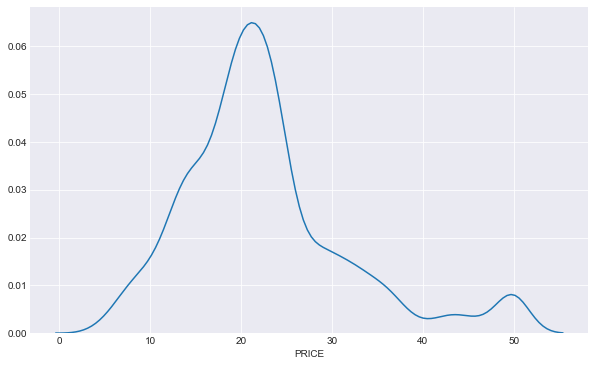

In [6]:
plt.figure(figsize = (10,6))

sns.distplot(df.PRICE , bins = 50 , hist = False)

plt.show()

### HISTOGRAM(RM)

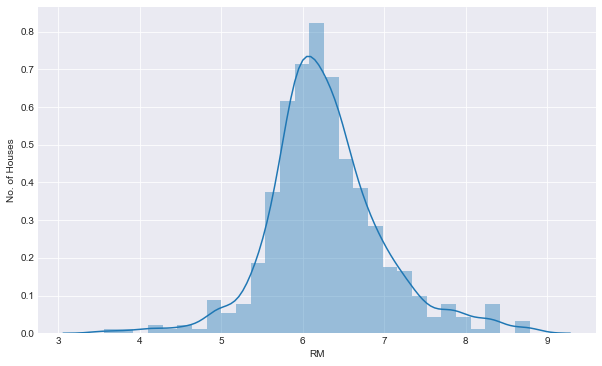

In [7]:
plt.figure(figsize = (10,6))

plt.xlabel("No. of Rooms")

plt.ylabel("No. of Houses")

sns.distplot(df.RM)

plt.show()

### BAR CHART(RAD)

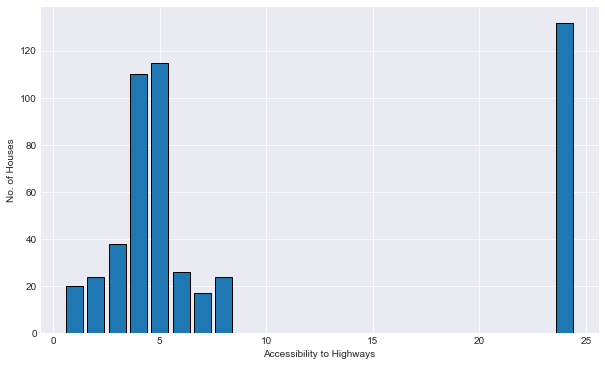

In [8]:
frequency = df.RAD.value_counts()

plt.figure(figsize = (10,6))

plt.style.use('seaborn-darkgrid')

plt.xlabel("Accessibility to Highways")

plt.ylabel("No. of Houses")

plt.bar(x = frequency.index , height = frequency , ec = "#000")

plt.show()

## DATA DESCRIPTION

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# CORRELATION
## $$ \rho _{XY} = corr(X,Y) $$

## $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$

### CORRELATION OF ALL THE DATA

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
useful_corr = np.zeros_like(df.corr())

triangle_indices = np.triu_indices_from(useful_corr)

useful_corr[triangle_indices] = True

useful_corr

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## HEATMAP OF CORRELATIONs IN DF 

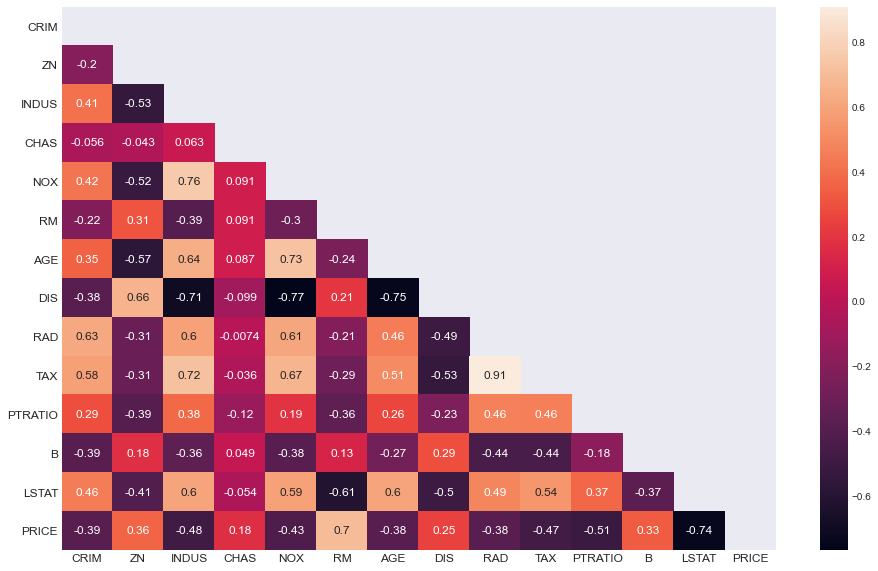

In [12]:
plt.figure(figsize = (16,10))

sns.heatmap(df.corr() , mask = useful_corr , annot = True , annot_kws = {"size":12})

plt.xticks(fontsize =12)

plt.yticks(fontsize =12)

plt.show()

## SCATTER PLOT B/W NOX AND DIS FEATURES

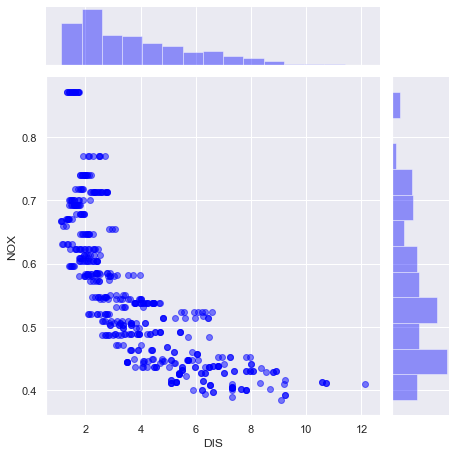

In [13]:
sns.set()

sns.jointplot(df.DIS , df.NOX , size = 6.5 , color = "blue" , joint_kws = {"alpha":0.5})

## SCATTER PLOT B/W TAX AND RAD FEATURES (REGRESSION)

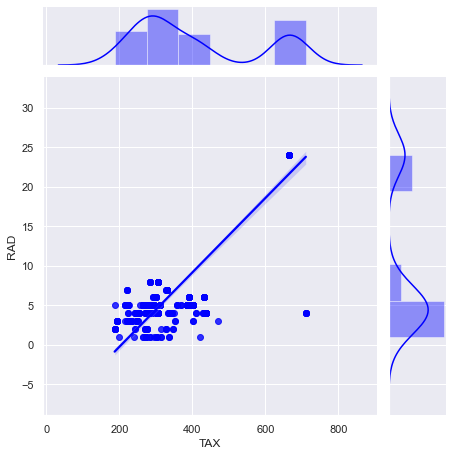

In [14]:
sns.set()

sns.jointplot(df.TAX , df.RAD , size = 6.5 , color = "blue" ,kind = "reg")

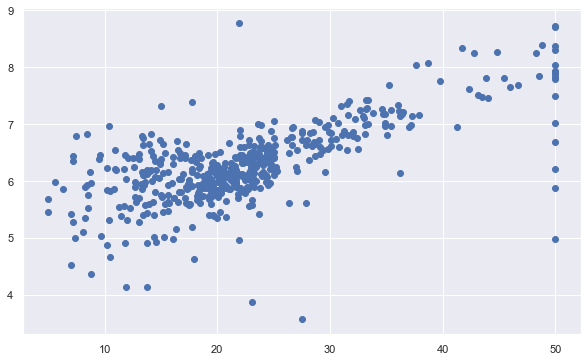

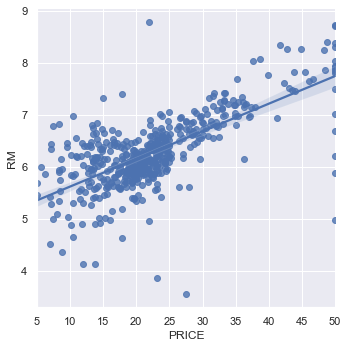

In [15]:
plt.figure(figsize = (10,6))

plt.scatter(df.PRICE , df.RM)

sns.lmplot(x = "PRICE" , y  ="RM"  , data = df )

plt.show()

# SPLITING TRAINING & TESTING DATA

In [16]:
prices = df.PRICE

features = df.drop("PRICE" , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)

In [17]:
regr = LinearRegression()

regr.fit(X_train , y_train)

LinearRegression()

In [18]:
print("Intercept: " , regr.intercept_)
print()
print("Score of training data: " , regr.score(X_train , y_train))
print()
print("Score of test data: " , regr.score(X_test , y_test))

pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ["Coef"])


Intercept:  36.53305138282418

Score of training data:  0.750121534530608

Score of test data:  0.6709339839115636


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## DATA TRANSFORMATIONS

In [19]:
print("Skew of data: " , df.PRICE.skew())

Skew of data:  1.1080984082549072


In [20]:
y_log = np.log(df.PRICE)

print("Skew of transformed data: " , y_log.skew())

Skew of transformed data:  -0.33032129530987864


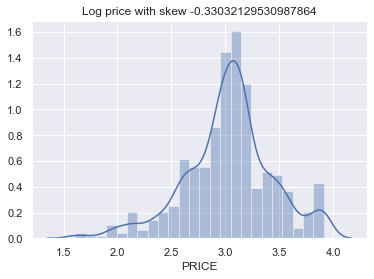

In [21]:
sns.distplot(y_log )

plt.title(f"Log price with skew {y_log.skew()}")

plt.show()

### GRAPH WITH REGULAR DATA (NO LOG TRANSFORMATION)

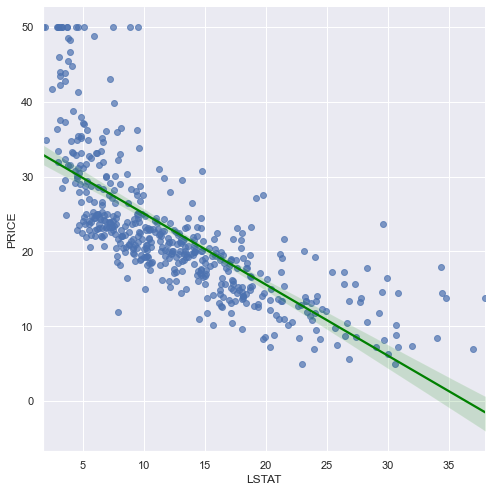

In [22]:
sns.lmplot(x = "LSTAT" , y = "PRICE" , data = df , size = 7 , scatter_kws  ={"alpha":0.7} , line_kws = {"color" : "green"})
plt.show()

### GRAPH WITH TRANSFORMED DATA (LOG TRANSFORMATION)

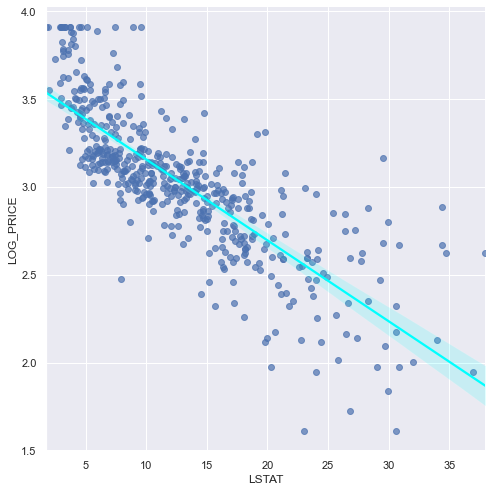

In [23]:
transformed_df = features
transformed_df["LOG_PRICE"] = y_log

sns.lmplot(x = "LSTAT" , y = "LOG_PRICE" , data = transformed_df , size = 7 , scatter_kws  ={"alpha":0.7} ,
            line_kws = {"color" : "cyan"})
            
plt.show()

# SPLITTING TRAINING AND
# TESTING DATA - II (LOG PRICES)

In [24]:
prices = np.log(df.PRICE) #using log prices

features = df.drop("PRICE" , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)

## REGRESSION USING LOG PRICES

In [25]:
regr = LinearRegression()

regr.fit(X_train , y_train)

print("Intercept: " , regr.intercept_)
print()
print("Score of training data: " , regr.score(X_train , y_train))
print()
print("Score of test data: " , regr.score(X_test , y_test))

pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ["Coef"])

Intercept:  4.059943871775182

Score of training data:  0.7930234826697584

Score of test data:  0.7446922306260724


,Coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [26]:
# CHARLES RIVER PROPERTY PREMIUM

np.e**0.080331

1.0836456950439142

# P-VALUES AND EVALUATING COEFFICIENTS

In [27]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const)

results = model.fit()

# results.params

pd.DataFrame({"Coef":results.params, "P-values":round(results.pvalues , 3)})

"""

not significant = INDUS , AGE

"""

'\n\nnot significant = INDUS , AGE\n\n'

## TESTING FOR MULTICOLLINEARITY

## $$ TAX = \alpha_0  + \alpha_1 RM + \alpha_2 NOX + ... +\alpha_13 LSTAT $$

## $$ VIF_{TAX} = \frac{1}{(1 - R_{TAX} ^ 2)}  $$

In [28]:
vif = [variance_inflation_factor(exog = X_incl_const.values , exog_idx = i) for i in range(len(X_incl_const.columns))]

pd.DataFrame({"Coef_Name":X_incl_const.columns , "VIF":np.around(vif , 2)})

,Coef_Name,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# MODEL SIMPLIFICATION AND BAYSIAN INFORMATION CRITERION(BIC)


In [29]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const)

results = model.fit()

# results.params

org_coef = pd.DataFrame({"Coef":results.params, "P-values":round(results.pvalues , 3)})

print(f"BIC: {results.bic}")
print(f"Results: {results.rsquared}")

org_coef

BIC: -139.74997769478898
Results: 0.7930234826697584


,Coef,P-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [30]:
#Reduced model #1 excluding indus
 
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"] , axis = 1)

model = sm.OLS(y_train , X_incl_const)

results = model.fit()

# results.params

coef_minus_indus = pd.DataFrame({"Coef":results.params, "P-values":round(results.pvalues , 3)})

print(f"BIC: {results.bic}")
print(f"Results: {results.rsquared}")

BIC: -145.14508855591163
Results: 0.7927126289415163


In [31]:
#Reduced model #2 excluding INDUS & AGE
 
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS" , "AGE"] , axis = 1)

model = sm.OLS(y_train , X_incl_const)

results = model.fit()

# results.params

reduced_coef = pd.DataFrame({"Coef":results.params, "P-values":round(results.pvalues , 3)})

print(f"BIC: {results.bic}")
print(f"Results: {results.rsquared}")

BIC: -149.49934294224678
Results: 0.7918657661852815


In [32]:
frames = [org_coef , coef_minus_indus , reduced_coef]

pd.concat(frames , axis = 1)

,Coef,P-values,Coef,P-values,Coef,P-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


# RESIDUALS AND RESIDUAL PLOTS

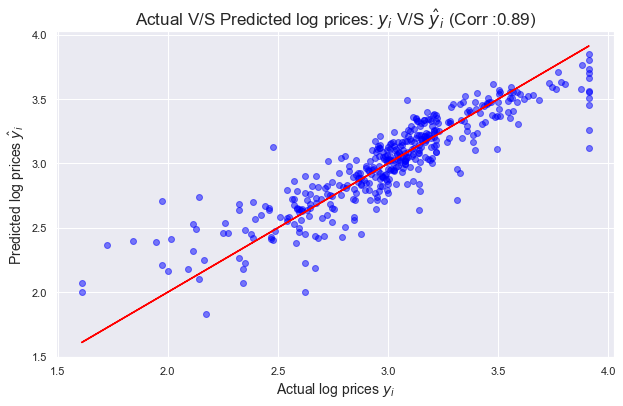

In [33]:
# Modified model: transformed(using log prices) & simplified (dropping two features)

prices = np.log(df.PRICE) #using log prices

features = df.drop(["PRICE" , "INDUS" , "AGE"] , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)

#USING statsmodels

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const)

results = model.fit()

#RESIDUALS 

# residuals = y_train - results.fittedvalues
# residuals.describe()
# results.resid

# GRAPH OF ACTUAL V/S  PREDICTED VALUES
corr = round(y_train.corr(results.fittedvalues) , 2)

plt.figure(figsize= (10,6))

plt.scatter(x = y_train , y = results.fittedvalues , alpha= 0.5 , c = "blue")

plt.plot(y_train , y_train , c = "red")

plt.xlabel("Actual log prices $y _i$" , fontsize = 14)

plt.ylabel("Predicted log prices $\hat y _i$" , fontsize = 14)

plt.title(f"Actual V/S Predicted log prices: $y _i$ V/S $\hat y _i$ (Corr :{corr})" , fontsize = 17)

plt.show()

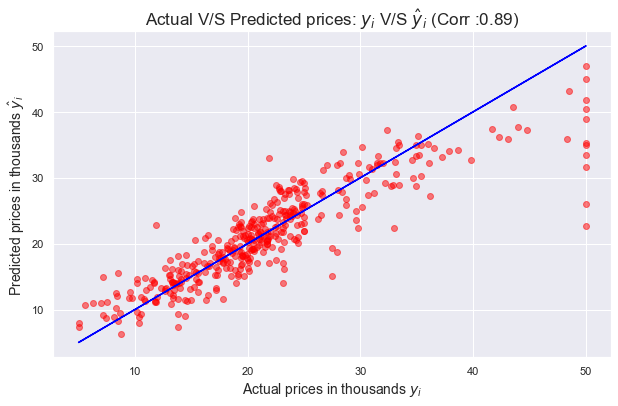

In [34]:
plt.figure(figsize= (10,6))

plt.scatter(x = np.e ** y_train , y = np.e ** results.fittedvalues , alpha= 0.5 , c = "red")

plt.plot(np.e ** y_train , np.e ** y_train , c = "blue")

plt.xlabel("Actual prices in thousands $y _i$" , fontsize = 14)

plt.ylabel("Predicted prices in thousands $\hat y _i$" , fontsize = 14)

plt.title(f"Actual V/S Predicted prices: $y _i$ V/S $\hat y _i$ (Corr :{corr})" , fontsize = 17)

plt.show()

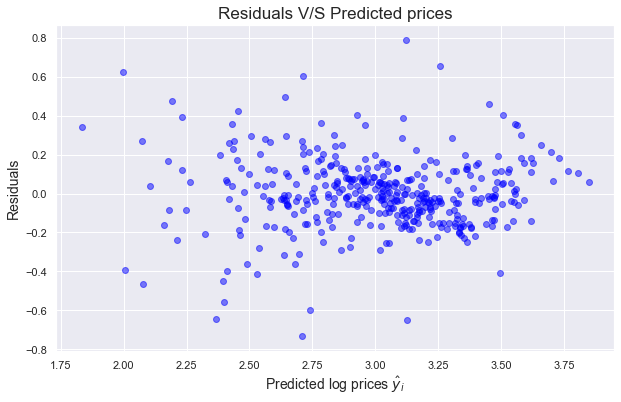

In [35]:
plt.figure(figsize= (10,6))

plt.scatter(x = results.fittedvalues , y = results.resid , alpha= 0.5 , c = "blue")

plt.xlabel("Predicted log prices $\hat y _i$" , fontsize = 14)

plt.ylabel("Residuals" , fontsize = 14)

plt.title(f"Residuals V/S Predicted prices" , fontsize = 17)

plt.show()

Text(0.5, 1.0, 'Log price model:Residuals skew : 0.118  residual mean : 0.0')

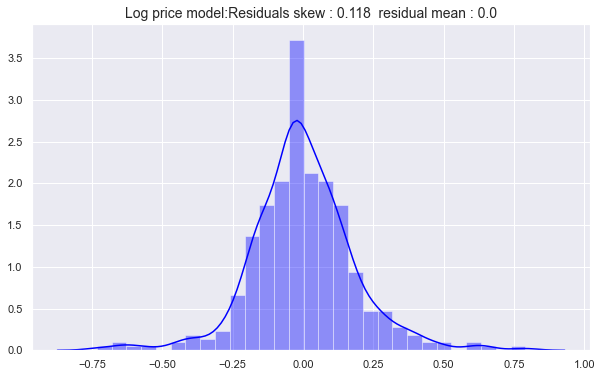

In [36]:
#Distribution of residuls (log prices) - checking for normality

resid_mean = round(results.resid.mean() , 3)

resid_skew = round(results.resid.skew() , 3)

plt.figure(figsize = (10,6))

sns.distplot(results.resid , color = "blue")

plt.title(f"Log price model:Residuals skew : {resid_skew}  residual mean : {resid_mean}" , fontsize = 14)

In [37]:
# MSE(MEAN SQUARED ERROR) AND R_SQUARED

reduced_log_mse = round(results.mse_resid , 3)

reduced_log_rsquared = round(results.rsquared,3)

reduced_log_rmse = np.sqrt(round(results.mse_resid , 3))